# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [1]:
import pandas as pd

url1 = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv'
url2 = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv'

#data from each as dataframe
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

#concatenate the dataFrames
combined_df = pd.concat([df1, df2], axis = 0)

combined_df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
139754,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
139755,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
139756,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [2]:
#FIPS codes
fips_url = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv'
fips_codes = pd.read_csv(fips_url)

#station_metadata
metadata_url = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv'
station_metadata = pd.read_csv(metadata_url)

#merged the combined_df with station metadata on 'ID'
merged_data = pd.merge(combined_df, station_metadata, on = 'ID')

#extract possible country codes from the first two character of 'ID'
merged_data['FIPS 10-4'] = merged_data['ID'].str[:2]

#merge on ID
df = pd.merge(merged_data, fips_codes, on = ['FIPS 10-4'])

#drop the column 'STNELEVE', 'FIP 10-4'
df.drop(['STNELEV', 'FIPS 10-4','ISO 3166'], axis = 1, inplace = True)
df = df.rename(columns={'Name':"Country"})

#convert temperature values to degrees Celsius
months = ['VALUE1', 'VALUE2', 'VALUE3', 'VALUE4', 'VALUE5', 'VALUE6', 
          'VALUE7', 'VALUE8', 'VALUE9', 'VALUE10', 'VALUE11', 'VALUE12']
df[months] = df[months] / 100

#select and renmae months to standard months
month_names = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
month_rename_dict = dict(zip(months, month_names))
df.rename(columns=month_rename_dict, inplace=True)

df

,ID,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,LATITUDE,LONGITUDE,NAME,Country
0,AG000060390,1901,10.34,8.44,11.64,15.34,15.64,23.54,24.44,23.64,22.14,16.04,13.64,10.04,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
1,AG000060390,1902,9.84,11.94,12.54,15.44,15.14,19.84,24.84,25.74,21.64,16.94,14.94,11.34,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
2,AG000060390,1903,11.44,10.64,12.66,13.46,16.46,19.06,23.26,24.46,21.46,19.26,13.56,10.56,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
3,AG000060390,1904,9.26,11.26,11.36,14.06,18.36,21.26,25.16,26.06,20.76,18.26,13.76,12.46,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
4,AG000060390,1905,9.06,8.66,13.86,15.76,15.96,21.46,23.26,24.96,22.06,17.16,13.86,10.76,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,ZA000067743,2020,NaN,24.00,23.75,NaN,NaN,NaN,16.05,NaN,NaN,NaN,NaN,NaN,-17.8170,25.817,LIVINGSTONE,Zambia
181311,ZAM00067663,2011,22.80,22.84,22.50,21.90,20.00,18.40,17.00,18.65,22.80,24.90,24.65,24.00,-14.4500,28.467,KABWE_MILLIKEN,Zambia
181312,ZAM00067663,2012,23.10,22.34,22.95,19.70,18.50,17.50,NaN,NaN,NaN,NaN,NaN,NaN,-14.4500,28.467,KABWE_MILLIKEN,Zambia
181313,ZAM00067663,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.85,-14.4500,28.467,KABWE_MILLIKEN,Zambia


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [3]:
def query_climate(df, country, year_begin, year_end, month):
    '''
    Query temperature readings for a specified country, year range, and month.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing climate data.
    - country (str): Name of the country to filter the climate data.
    - year_begin (int): The starting year for the data query.
    - year_end (int): The ending year for the data query.
    - month (int): The month for which the temperature data is required

    Returns:
    - pd.DataFrame: A DataFrame containing the filtered climate data with columns for station name,
      latitude, longitude, country, year, month, and temperature for the specified month.
    '''
    
    #filter the DataFrame based on the country and year range
    filtered_df = df[
        (df['Country'] == country) & 
        (df['Year'] >= year_begin) & 
        (df['Year'] <= year_end) 
    ]
    
    #identify the month column name
    month_column = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                    'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'][month - 1]
    
    #select the data for the specified month and create the final DataFrame
    result_df = filtered_df[['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year']].copy()
    result_df['Month'] = month
    result_df['Temp'] = filtered_df[month_column]
    
    #Drop rows where the temperature data is NaN before calculating the average
    result_df = result_df.dropna(subset=['Temp'])
    
    #Latitude and Longitude precision and temperature values
    result_df['LATITUDE'] = result_df['LATITUDE'].round(2)
    result_df['LONGITUDE'] = result_df['LONGITUDE'].round(2)
    result_df['Temp'] = result_df['Temp'].round(2)
    
    return result_df

Run this example and check if you get the correct result, your obtained dataframe looks like:

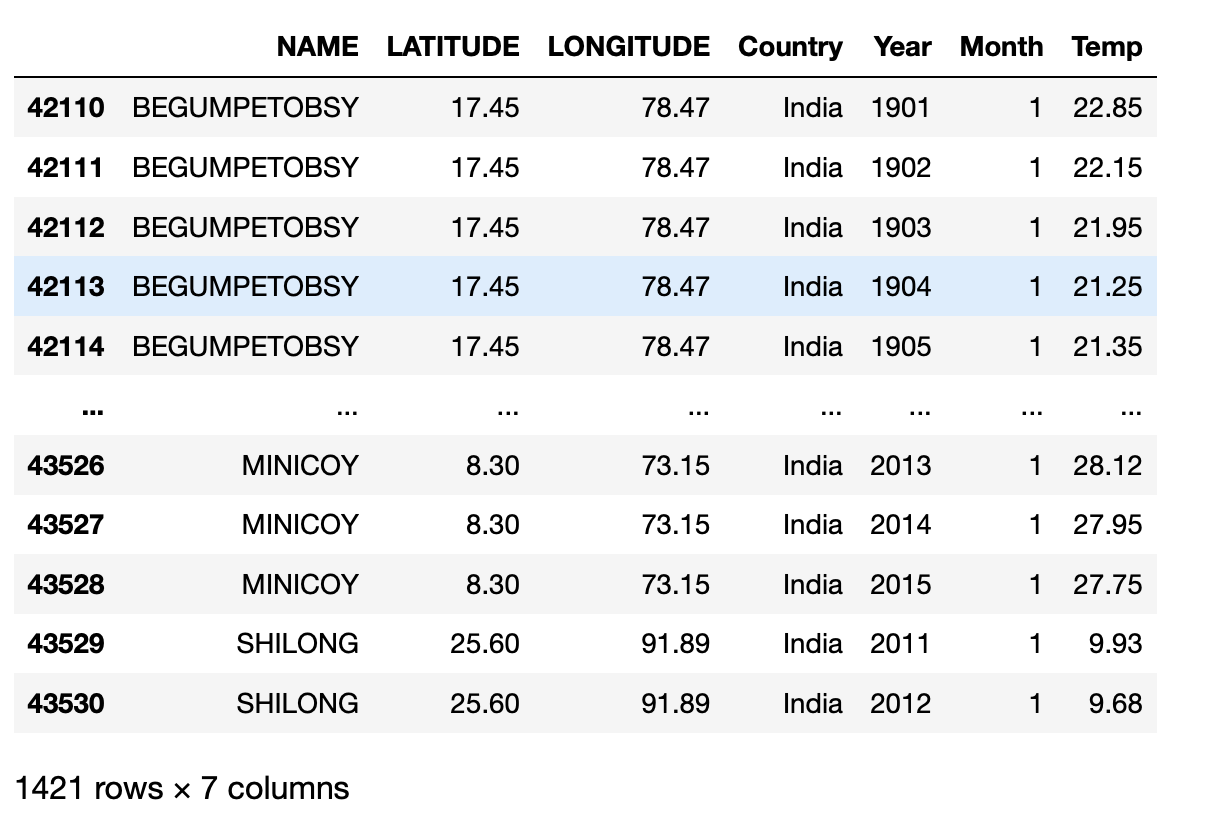

In [4]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
42110,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
42111,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
42112,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
42113,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
42114,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
43526,MINICOY,8.30,73.15,India,2013,1,28.12
43527,MINICOY,8.30,73.15,India,2014,1,27.95
43528,MINICOY,8.30,73.15,India,2015,1,27.75
43529,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

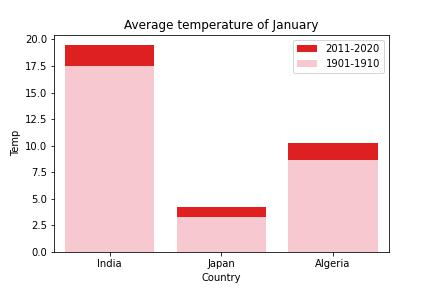

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

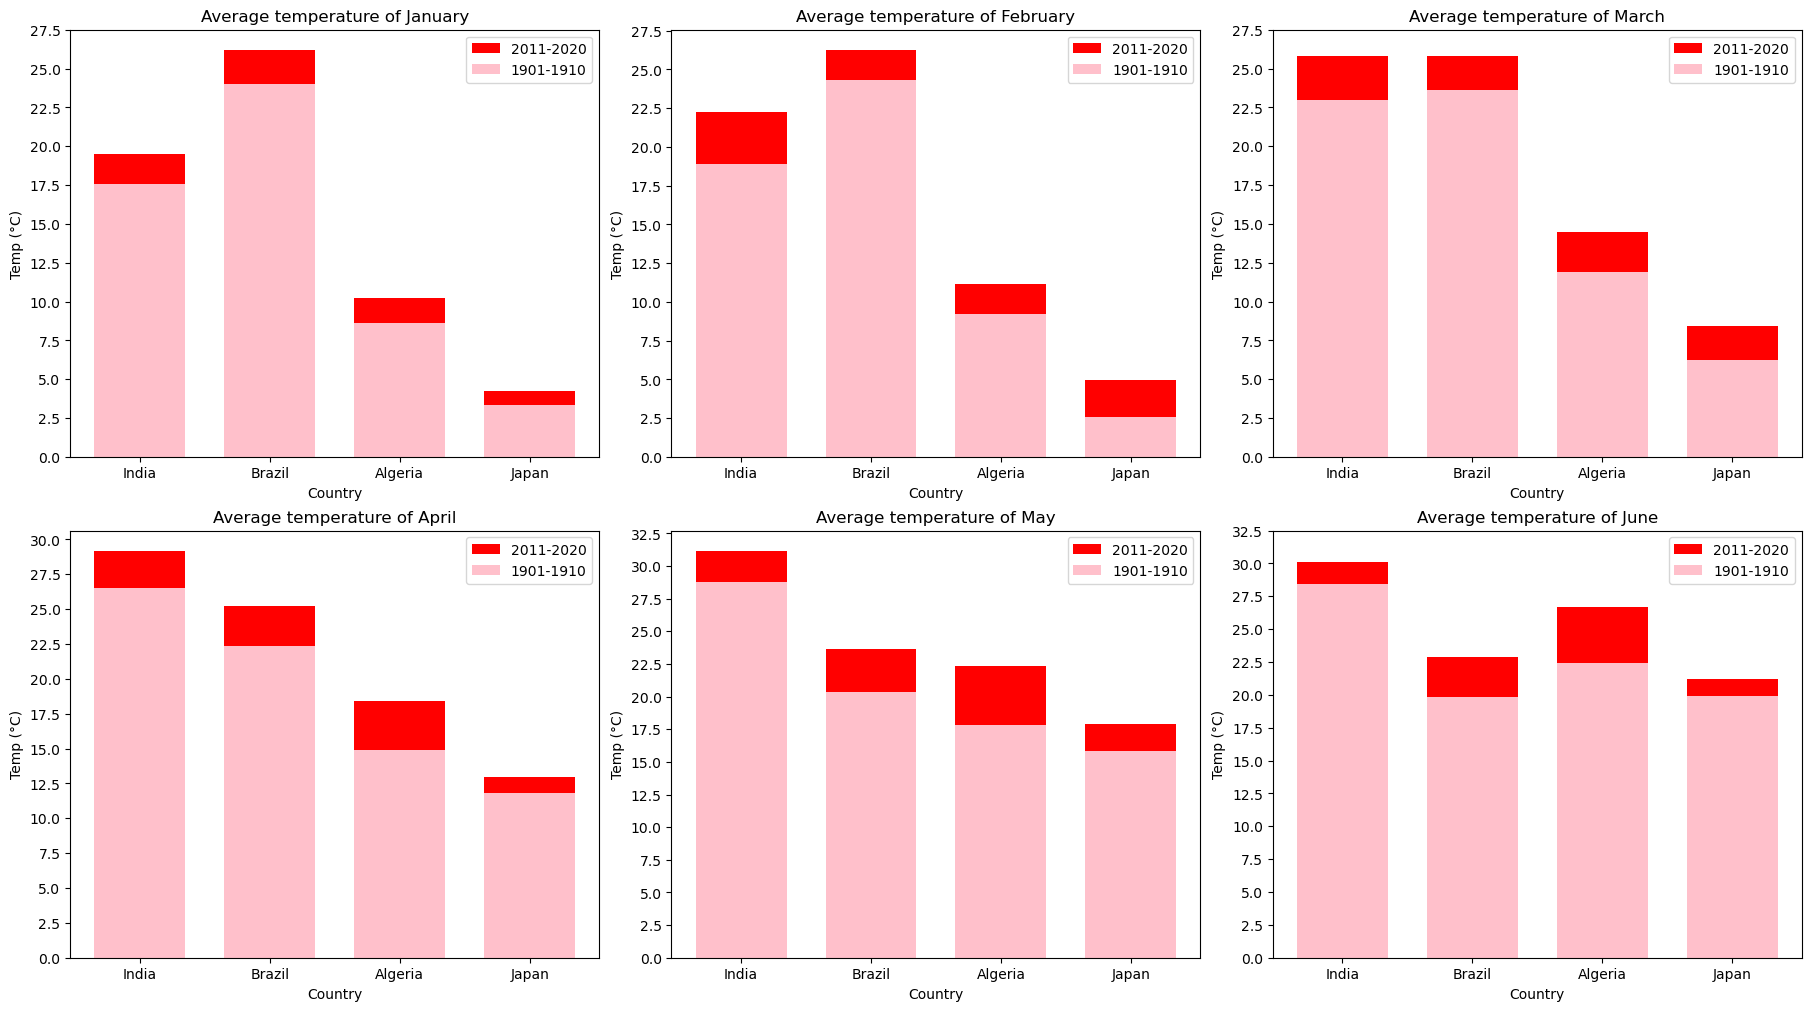

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

def plot_average_temps(df, countries, year_ranges, months):
    """
    Plot the average temperatures for selected countries over two different time ranges.

    Parameters:
    - df : pd.DataFrame
        The DataFrame containing the temperature data.
    - countries : list
        The list of countries to be plotted.
    - year_ranges : list of tuples
        A list containing the time ranges, each a tuple of start and end year.
    - months : list
        The list of months (as integers) for which the average temperatures are to be plotted.

    The function will display a 2x3 grid of bar charts, each representing the average
    temperature of a different month for the selected countries. Each chart contains two sets
    of bars for the specified time ranges.
    """
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10), constrained_layout=True)
    axes = axes.flatten()
    colors = ['pink', 'red'] 

    for i, month in enumerate(months):
        ax = axes[i]
        month_name = calendar.month_name[month]
        bar_positions = np.arange(len(countries))
        bar_width = 0.7

        # Plot the bars for the second date range first
        second_range_averages = [query_climate(df, country, year_ranges[1][0], year_ranges[1][1], month)['Temp'].mean() for country in countries]
        ax.bar(bar_positions, second_range_averages, bar_width, color=colors[1], label=f"{year_ranges[1][0]}-{year_ranges[1][1]}")

        # Then plot the bars for the first date range on top (shorter bars)
        first_range_averages = [query_climate(df, country, year_ranges[0][0], year_ranges[0][1], month)['Temp'].mean() for country in countries]
        ax.bar(bar_positions, first_range_averages, bar_width, color=colors[0], label=f"{year_ranges[0][0]}-{year_ranges[0][1]}")

        #Set titles, labels, legends.
        ax.set_title(f'Average temperature of {month_name}')
        ax.set_xticks(bar_positions)
        ax.set_xticklabels(countries)
        ax.set_xlabel('Country')
        ax.set_ylabel('Temp (°C)')
        ax.legend()
        
        #Adjust the y-axis to show increments of 2.5
        max_temp = max(max(first_range_averages), max(second_range_averages))
        y_ticks = np.arange(0, max_temp + 2.5, 2.5)
        ax.set_yticks(y_ticks)

        
    plt.show()
    

#Choose of countries, years ranges, and months
countries = ['India','Brazil','Algeria','Japan']
year_ranges = [(1901, 1910), (2011, 2020)]
months = [1, 2, 3, 4, 5, 6]

plot_average_temps(df, countries, year_ranges, months)

### Conclusion:

Based on the generated output, it appears taht for all selected countries, the average temperature in the years 2011-2020 is higher than the average temperature in 1901-1910 for the months displayed. This means that a general global warming trend increase over the last century given that we see a quite large increased in average temperatures among different countries.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#prepare a dataframe specifically for plotting
df_plot = (
    df.copy()
    .set_index(["ID", "Year", "NAME", "LONGITUDE", "LATITUDE", "Country"])
    .stack()
    .reset_index()
    .rename(columns={"level_6": "Month", 0: "Temperature (C)"})
)
#create a mapping from month abbreviations to integers
month_mapping = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}

#apply the mapping to the 'Month' column
df_plot['Month'] = df_plot['Month'].map(month_mapping)
df_plot

,ID,Year,NAME,LONGITUDE,LATITUDE,Country,Month,Temperature (C)
0,AG000060390,1901,ALGER_DAR_EL_BEIDA,3.250,36.7167,Algeria,1,10.34
1,AG000060390,1901,ALGER_DAR_EL_BEIDA,3.250,36.7167,Algeria,2,8.44
2,AG000060390,1901,ALGER_DAR_EL_BEIDA,3.250,36.7167,Algeria,3,11.64
3,AG000060390,1901,ALGER_DAR_EL_BEIDA,3.250,36.7167,Algeria,4,15.34
4,AG000060390,1901,ALGER_DAR_EL_BEIDA,3.250,36.7167,Algeria,5,15.64
...,...,...,...,...,...,...,...,...
1899682,ZAM00067663,2012,KABWE_MILLIKEN,28.467,-14.4500,Zambia,4,19.70
1899683,ZAM00067663,2012,KABWE_MILLIKEN,28.467,-14.4500,Zambia,5,18.50
1899684,ZAM00067663,2012,KABWE_MILLIKEN,28.467,-14.4500,Zambia,6,17.50
1899685,ZAM00067663,2015,KABWE_MILLIKEN,28.467,-14.4500,Zambia,12,24.85


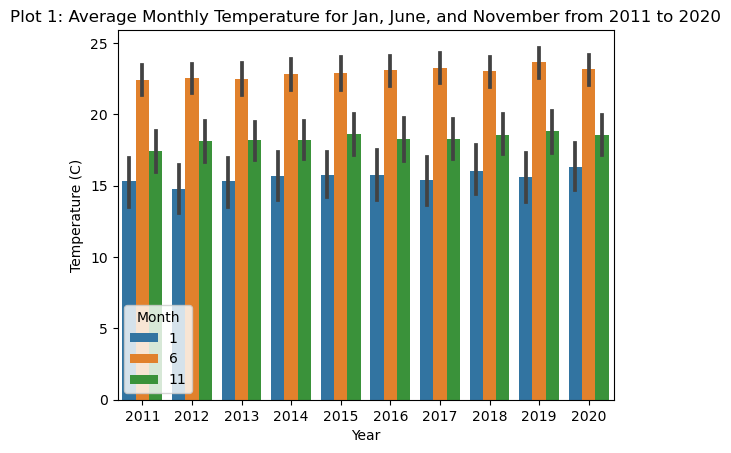

In [8]:
# Filter the dataframe
df_plot_1 = df_plot.groupby(["Month","Year","Country"])["Temperature (C)"].mean().reset_index()
df_plot_1 = df_plot_1[(df_plot_1["Month"].isin([1,6,11])) & (df_plot_1["Year"] >= 2011) & (df_plot_1["Year"] <= 2020)]

#Use Seaborn to create the bar plot
sns.barplot(data=df_plot_1, x="Year", y="Temperature (C)", hue="Month", errorbar="ci")

#Add a title
plt.title('Plot 1: Average Monthly Temperature for Jan, June, and November from 2011 to 2020')

# Show the plot
plt.show()

### Description to plot 1 

The plot showed the average monthly temperature for Jan, June, November from the years 2011 to 2020. The plot visualizes the average temperature (in degrees Celsius) over these months for a span of 10 years. On the x-axis, we see consecutive years from 2011 to 2020. The y-axis represents temperature in Celsius, raning from 0 to around 25. The bars shows variability in temperature, with June generally exhibiting high temperatures compared to Jan and November. Highlighting the cooler temperaturs of January, the warmth of June and the coolling trend that begins in November. Based on the erro bars on each temperature bar signifies the confidence interval for the mean temperature of each month in a given year, suggesting the precision of the temperature estimates. The error bars vary across different months and years, indicating the degree of temperature variability for those periods.

From this visualization, one can observe the fluctuating temperatures typical of the different seasons within each year. The plot does not suggest a clear trend of increasing or decreasing temperatures over the years; rather, it reflects the expected seasonal changes. There is no evident pattern to suggest that global average temperatures are increasing or decreasing solely based on this chart. However, the error bars do seem smaller for June in most years, which could imply less variability in summer temperatures compared to January and November.

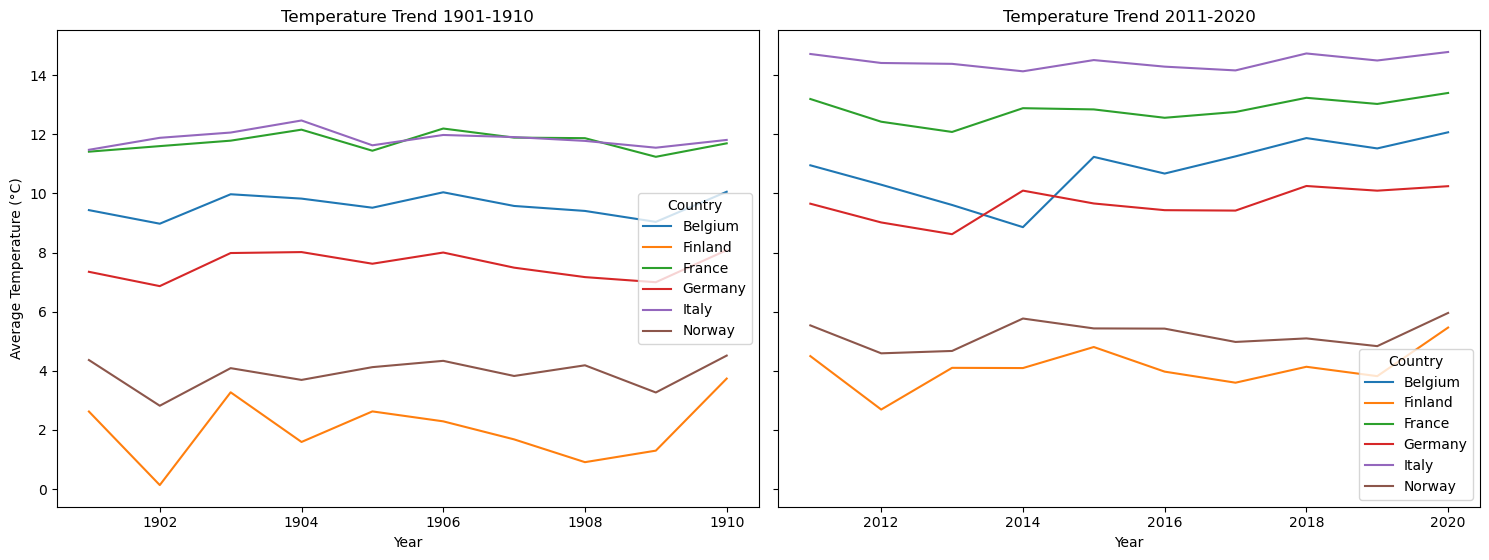

In [9]:
# Filter the DataFrame for the selected countries and the two year ranges.
selected_countries = ["France", "Germany", "Italy", "Finland", "Belgium", "Finland", "Norway"]
time_period_1 = (df_plot['Year'] >= 1901) & (df_plot['Year'] <= 1910)
time_period_2 = (df_plot['Year'] >= 2011) & (df_plot['Year'] <= 2020)

df_period_1 = df_plot[time_period_1 & df_plot['Country'].isin(selected_countries)]
df_period_2 = df_plot[time_period_2 & df_plot['Country'].isin(selected_countries)]

# Calculate the mean temperature for each country and year within the two periods.
df_period_1_grouped = df_period_1.groupby(['Country', 'Year'])['Temperature (C)'].mean().reset_index()
df_period_2_grouped = df_period_2.groupby(['Country', 'Year'])['Temperature (C)'].mean().reset_index()

# Create a figure and two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# First subplot for 1901-1910
sns.lineplot(data=df_period_1_grouped, x='Year', y='Temperature (C)', hue='Country', ax=ax1)
ax1.set_title('Temperature Trend 1901-1910')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)')

# Second subplot for 2011-2020
sns.lineplot(data=df_period_2_grouped, x='Year', y='Temperature (C)', hue='Country', ax=ax2)
ax2.set_title('Temperature Trend 2011-2020')
ax2.set_xlabel('Year')

plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.show()

### Description to plot 2

The plot focused specifcally among countries in Europe. On the left, the plot shows temperature trends over a decade in the early 20th century. Each line represents one of the six countries, with Belgium, Finland, France, Germany, Italy, and Norway included in the analysis. The average temperatures range from just above 0°C to around 14°C. Finland shows the coldest temperatures across the decade, while Italy and Belgium shows the warmest. There is a notable spread in the temperatures among the countries, reflecting different climate conditions.

On the right, the plots reflects the temperature trends for the same countries but a century later, in the recent decade. The temperature profiles show that average temperatures have generally increased across all countries, now ranging roughly from about 6°C to 14°C. This plot exhibits less variation in temperature between the countries compared to the 1901-1910 plot, suggesting a convergence in average temperatures over the past century.

In both graphs, the lines show some yearly fluctuations, but there's a clear overall trend of warmer average temperatures in the 2011-2020 period compared to 1901-1910 for each country. The consistency of warmer temperatures in the recent decade could be a visual indication of the long-term warming trend often associated with global climate change. To summarize, there is clear evidence of average temperature increasing happening among nations in Europe from the year of 1901 to 2020.

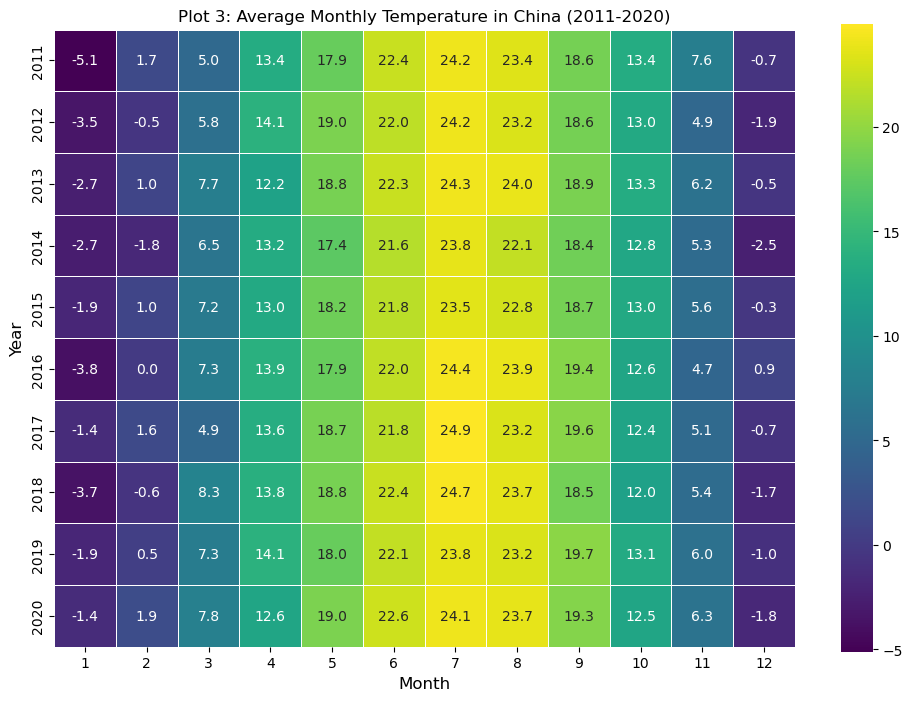

In [10]:
#filter the dataset for China and the years 2011 to 2020
df_china = df_plot.query("Country == 'China' and 2011 <= Year <= 2020")

#create a pivot table for the heatmap
pivot_table = df_china.pivot_table(values='Temperature (C)', index='Year', columns='Month', aggfunc='mean')

#set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 7))

#draw the heatmap
sns.heatmap(pivot_table, ax=ax, cmap='viridis', annot=True, fmt=".1f", linewidths=0.7, square=True)

#set the title and labels
ax.set_title('Plot 3: Average Monthly Temperature in China (2011-2020)')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Year', fontsize=12)

#layout
plt.tight_layout()

#display
plt.show()

### Description to plot 3

The 2D heatmap provides a visual representation of the average monthly temperatures in China from 2011 to 2020. The color gradient reflects the temperature scale, with cooler temperatures depicted in purples and blues, transitioning to greens and yellows for warmer temperatures, and culminating in yellow-greens for the warmest readings.

Examining the columns, there's a discernible trend of temperatures rising from January through to the summer months, peaking around July, and subsequently falling toward December. The first column, representing January, shows a noticeable warming trend over the years, with average temperatures rising from colder to milder winters.

Summer months show less variability, but there is a distinct increase in average temperatures from 2017 to 2020 during June, July, and August. Winter months, on the other hand, exhibit a more significant warming trend. For example, the temperature range in 2011 was quite broad, with a span of approximately 29.3 degrees Celsius between the coldest and warmest months. By contrast, in 2020, the range narrowed to about 25.5 degrees Celsius, indicating milder winter conditions.

Seasonal contrasts appear to be diminishing over the ten-year span, which could be interpreted as an effect of global warming, where winters are becoming progressively warmer. This heatmap not only provides a snapshot of seasonal variations but also hints at a broader trend of rising temperatures over the decade. The data supports the conclusion that there is a general warming trend in China, as evidenced by the increasing average temperatures, particularly in the winter months.









## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell